# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries



In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
**Reading in the advertising.csv file and set it to a data frame called df.**

In [3]:
df =pd.read_csv('advertising.csv')

**Checking the head of df**

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Used info and describe() on ad_data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


** Null data not found in any column**

In [13]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!



** Creating a histogram of the Age**

Text(0.5, 0, 'Age of visitors')

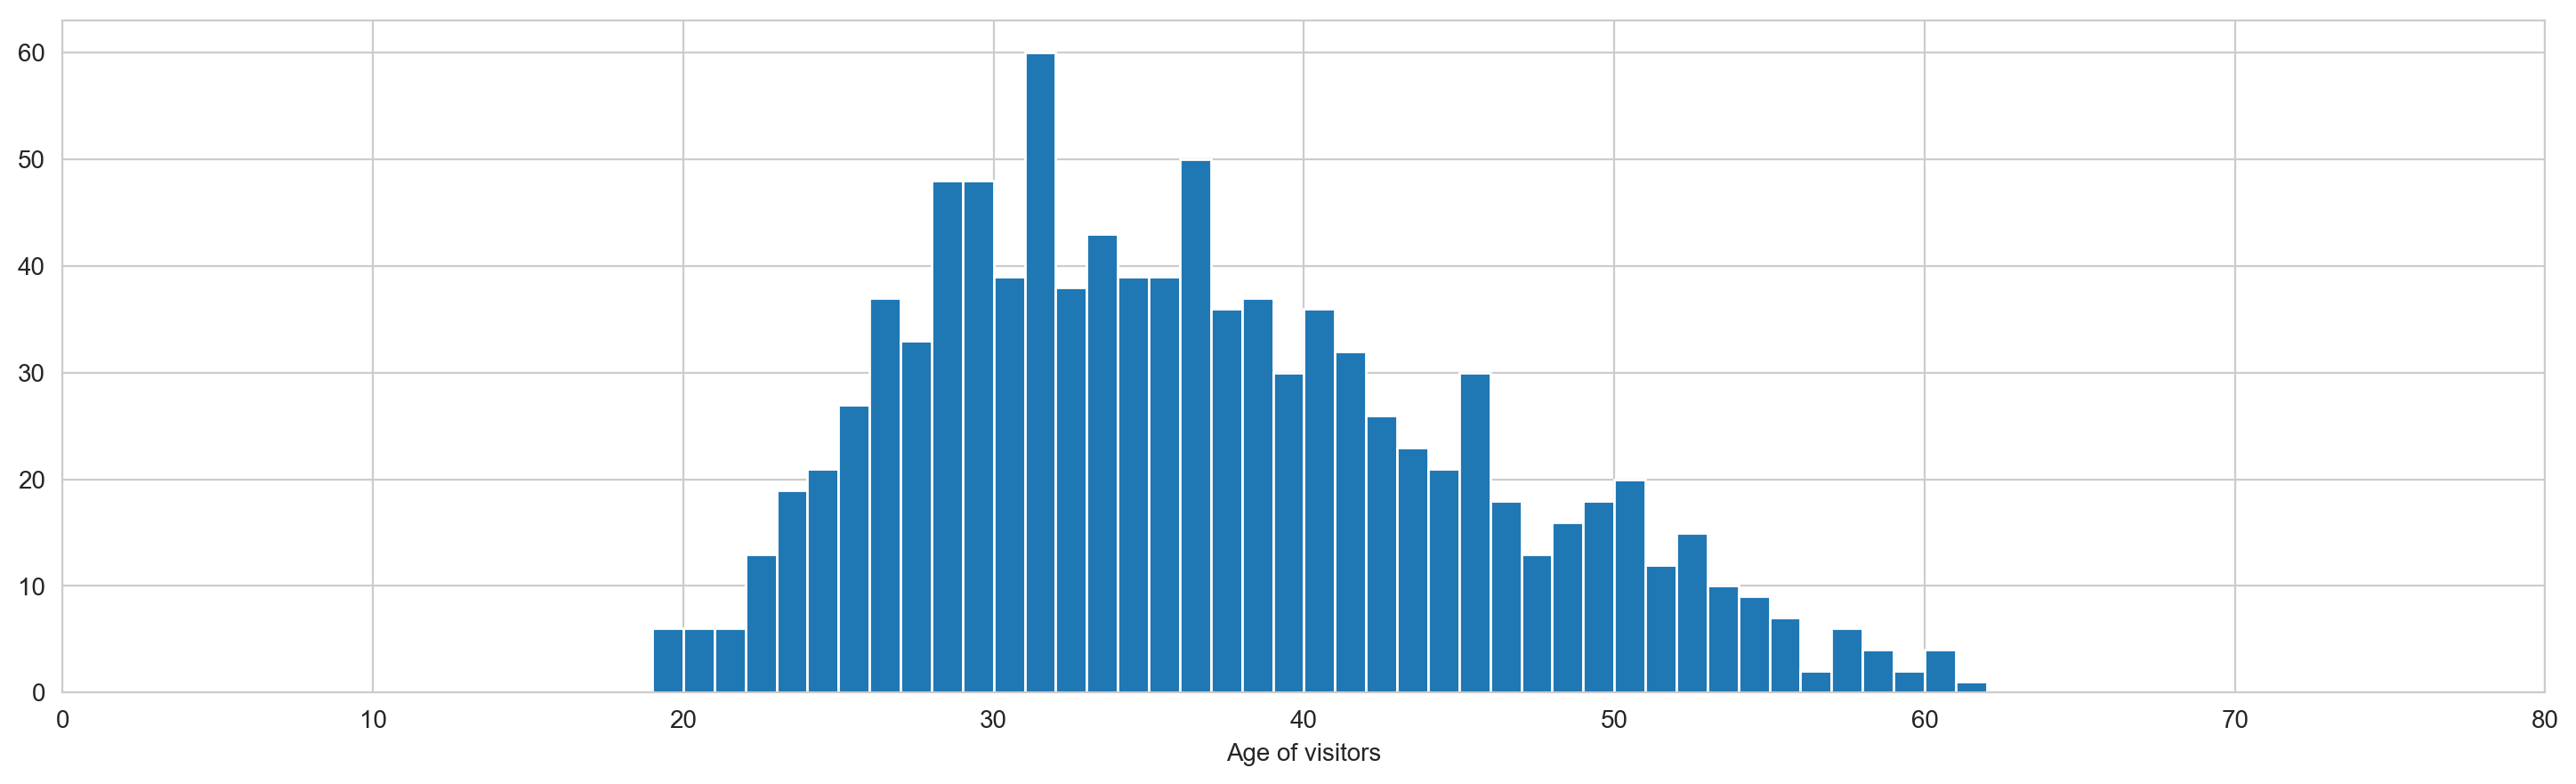

In [102]:
plt.figure(figsize=(18,5),dpi=200)
sns.set_style('whitegrid')
plt.xlim([0,80])
plt.hist(df['Age'],bins=range(0,80,1))
plt.xlabel('Age of visitors')


** most of the visitors are of age between 25-45years**

**Creating a jointplot showing Area Income versus Age.**

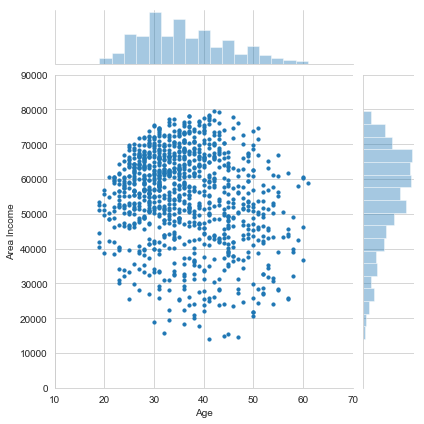

In [99]:
sns.jointplot(x='Age',y='Area Income',data=df,s=10,xlim=[10,70],ylim=[0,90000])

** visitors age between 20-50 years old having higher income**

**Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

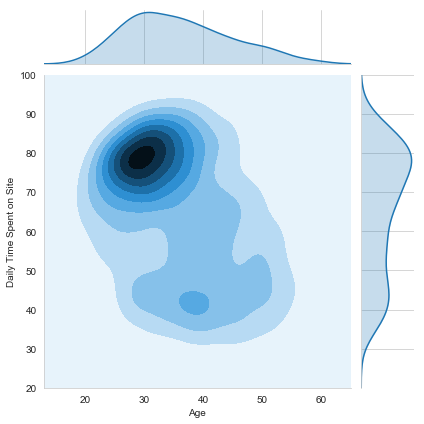

In [122]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,kind='kde',xlim=[13,65],ylim=[20,100])

** Around 60-90 hours of time is being spent on the site daily of people in the range of 20-50 years old**

**Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

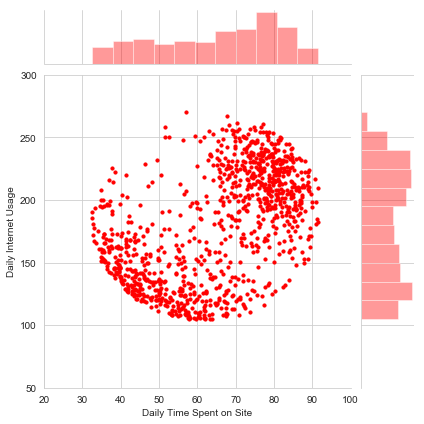

In [128]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='red',s=10,xlim=[20,100],ylim=[50,300])

** Daily time spent on site is directly proportional to data internet usage**

**Finally, lets create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

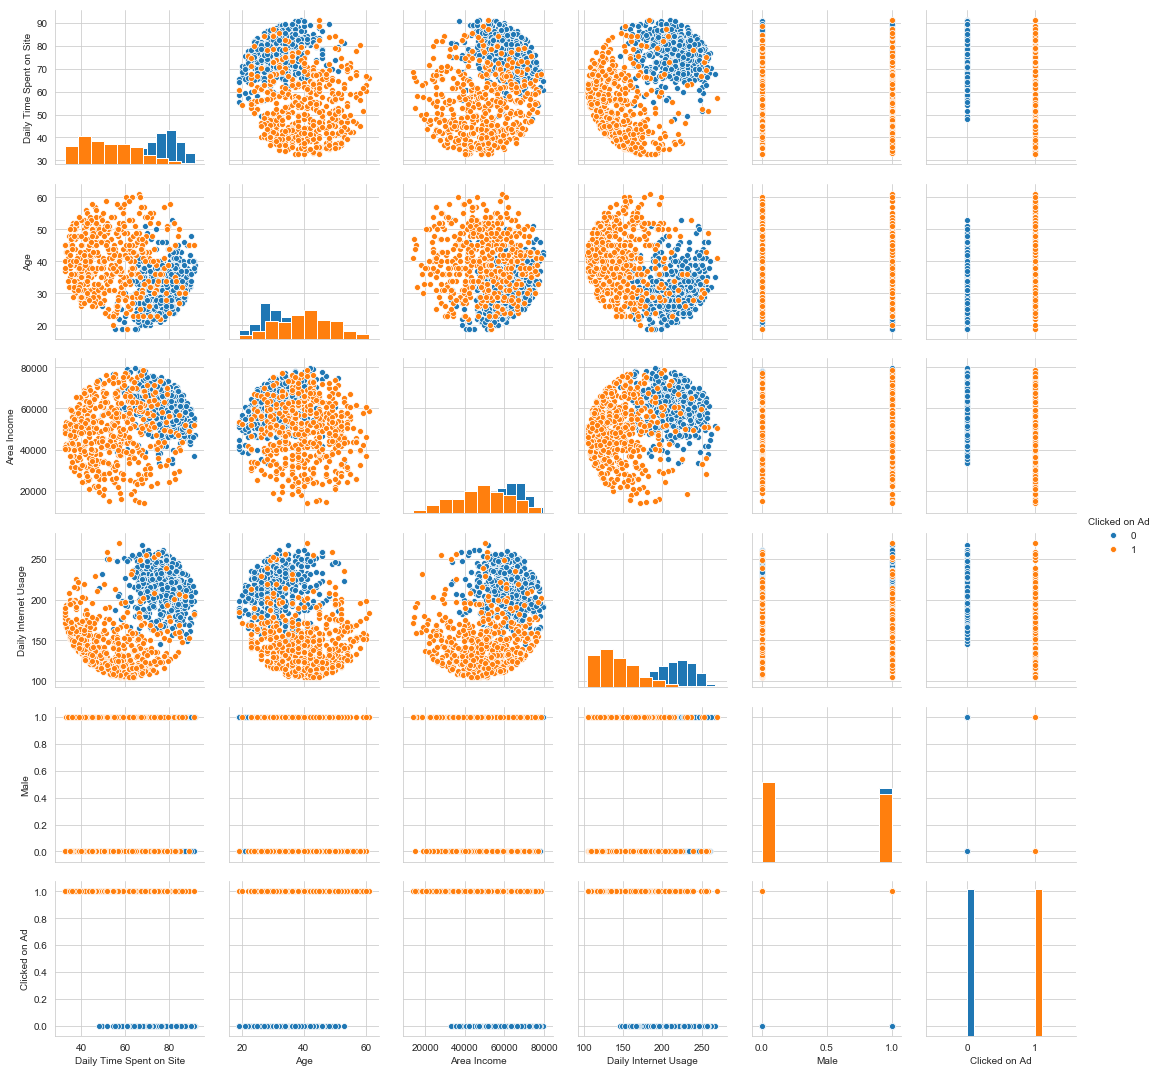

In [134]:
g=sns.pairplot(data=df,hue='Clicked on Ad',diag_kind='hist')
g

# Logistic Regression

Now it's time to do a train test split, and train our model!


** Split the data into training set and testing set using train_test_split**

In [147]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [135]:
from sklearn.model_selection import train_test_split

In [137]:
X = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = df['Clicked on Ad']

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

** Training and fit a logistic regression model on the training set.**

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
cl = LogisticRegression()

In [141]:
cl.fit(X_train,y_train)

C:\Users\Pradip\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [144]:
ypred = cl.predict(X_test)

In [145]:
from sklearn.metrics import confusion_matrix

In [146]:
confusion_matrix(y_test,ypred)

array([[148,   9],
       [ 20, 123]], dtype=int64)